# Business Understanding

If there's one thing most of us can admit about the past two years, it's that the pandemic has changed the way we eat. It brought unprecedented difficulties for the restaurant industry. Take-out and drive-thrus have seen a major boost in the past few years. However, this does not work with every restaurant. Dine-in is the major way how people get the full service from the restaurant, especially true for the high-end restaurants.

Fogo de Chao, as one of the high-end traditional Brazilian steakhouse franchises, is looking to expand their restaurant chain in King County, Washington state. It is a risky investment, particularly under the current circumstance which the pandemic is not over yet. Fogo de Chao must be very careful with picking the location for their new restaurant.  As the restaurant that provides the top-tier service, Fogo de Chao focuses their potential customers on high-income families. In other words, Fogo de Chao wants to settle the location of their new restaurant somewhere around high-value houses, by that way it will have the best chance of success. So, based on their requirement our job is to help Fogo de Chao to pick the most ideal place using some of the housing data collected from King County.  

# Data Understanding

In [2]:
# import all necessary python packages
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.feature_selection import RFECV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor

%matplotlib inline

In [3]:
# load in data set
df = pd.read_csv('./data/kc_house_data.csv')

In [4]:
# initially inspect the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Data Cleaning

In [5]:
# determine where nulls are in our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

It appears that we only have three columns that contain null values: waterfront, view, and yr_renovated.

In [6]:
# Drop all null values from the two specified columns
df.dropna(subset=['waterfront', 'view'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19164 non-null  int64  
 1   date           19164 non-null  object 
 2   price          19164 non-null  float64
 3   bedrooms       19164 non-null  int64  
 4   bathrooms      19164 non-null  float64
 5   sqft_living    19164 non-null  int64  
 6   sqft_lot       19164 non-null  int64  
 7   floors         19164 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           19164 non-null  object 
 10  condition      19164 non-null  object 
 11  grade          19164 non-null  object 
 12  sqft_above     19164 non-null  int64  
 13  sqft_basement  19164 non-null  object 
 14  yr_built       19164 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        19164 non-null  int64  
 17  lat            19164 non-null  float64
 18  long  

In [8]:
df.yr_renovated.value_counts()

0.0       15111
2014.0       64
2013.0       29
2005.0       27
2000.0       25
          ...  
1953.0        1
1950.0        1
1954.0        1
1959.0        1
1971.0        1
Name: yr_renovated, Length: 70, dtype: int64

Based on the above value counts, we will drop the yr_renovated column.

In [9]:
# Drop the yr_renovated column
df.drop(columns='yr_renovated', axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19164 non-null  int64  
 1   date           19164 non-null  object 
 2   price          19164 non-null  float64
 3   bedrooms       19164 non-null  int64  
 4   bathrooms      19164 non-null  float64
 5   sqft_living    19164 non-null  int64  
 6   sqft_lot       19164 non-null  int64  
 7   floors         19164 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           19164 non-null  object 
 10  condition      19164 non-null  object 
 11  grade          19164 non-null  object 
 12  sqft_above     19164 non-null  int64  
 13  sqft_basement  19164 non-null  object 
 14  yr_built       19164 non-null  int64  
 15  zipcode        19164 non-null  int64  
 16  lat            19164 non-null  float64
 17  long           19164 non-null  float64
 18  sqft_l

We now how no null values in our data!

In [11]:
df.zipcode.value_counts()

98103    539
98038    525
98115    513
98052    506
98117    495
        ... 
98102     89
98010     87
98024     72
98148     51
98039     45
Name: zipcode, Length: 70, dtype: int64

In [12]:
# We will only select zipcodes within Seattle because it wouldn't make sense for a high-end restaurant to open outside of an urban area
df_seattle = df[(df['zipcode'] >= 98101) & (df['zipcode'] <= 98199)]

In [13]:
df_seattle.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,Average,7 Average,1050,730.0,1960,98146,47.5123,-122.337,1780,8113
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,NO,NONE,Good,7 Average,860,300.0,1942,98115,47.6900,-122.292,1330,6000
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,NO,NONE,Average,7 Average,1810,0.0,1900,98107,47.6700,-122.394,1360,4850


In [14]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7949 entries, 1 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7949 non-null   int64  
 1   date           7949 non-null   object 
 2   price          7949 non-null   float64
 3   bedrooms       7949 non-null   int64  
 4   bathrooms      7949 non-null   float64
 5   sqft_living    7949 non-null   int64  
 6   sqft_lot       7949 non-null   int64  
 7   floors         7949 non-null   float64
 8   waterfront     7949 non-null   object 
 9   view           7949 non-null   object 
 10  condition      7949 non-null   object 
 11  grade          7949 non-null   object 
 12  sqft_above     7949 non-null   int64  
 13  sqft_basement  7949 non-null   object 
 14  yr_built       7949 non-null   int64  
 15  zipcode        7949 non-null   int64  
 16  lat            7949 non-null   float64
 17  long           7949 non-null   float64
 18  sqft_li

<AxesSubplot:>

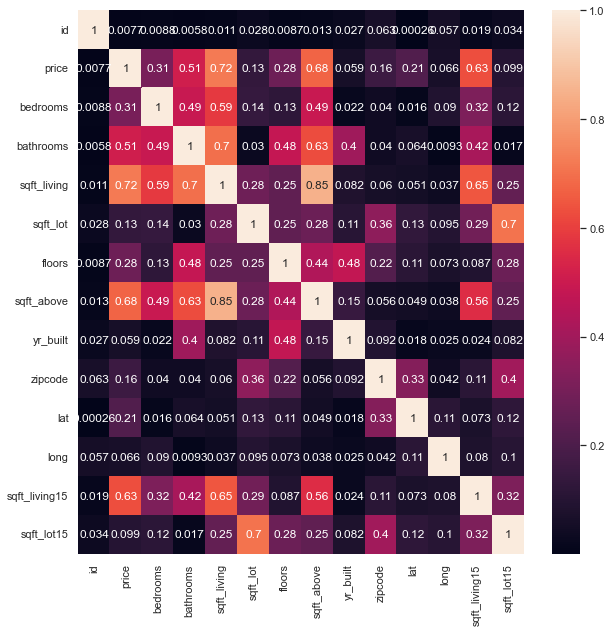

In [15]:
# Create a heatmap to get our initial correlation values for price
sns.set(rc={'figure.figsize':(10, 10)})
sns.heatmap(abs(df_seattle.corr()), annot=True)

# Create First Simple Model and Dummy Model

In [16]:
df_seattle.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,Average,7 Average,1050,730.0,1960,98146,47.5123,-122.337,1780,8113
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,NO,NONE,Good,7 Average,860,300.0,1942,98115,47.6900,-122.292,1330,6000
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,NO,NONE,Average,7 Average,1810,0.0,1900,98107,47.6700,-122.394,1360,4850


In [17]:
# Remove all rows that don't have sqft_basement data
df_seattle = df_seattle[df_seattle['sqft_basement'] != '?']

In [18]:
# Create our X and y variables
X = df_seattle.drop(columns='price', axis=1)
y = df_seattle['price']

In [19]:
# Create train-test split for data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

In [20]:
# Confirm that X_train is three times larger than X_test
print(X_train.shape, X_test.shape)

(5819, 19) (1940, 19)


In [21]:
X_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
12171,6610000320,9/10/2014,3,1.75,2040,4125,1.5,NO,NONE,Good,8 Good,1540,500.0,1917,98107,47.6608,-122.359,1620,4400
11338,6430500238,12/16/2014,4,1.50,1500,3075,2.0,NO,NONE,Very Good,7 Average,1420,80.0,1929,98103,47.6893,-122.350,1480,3774
8169,3333002710,9/17/2014,3,1.00,1550,8778,1.0,NO,NONE,Average,7 Average,1250,300.0,1952,98118,47.5413,-122.281,2120,7268
13395,9482700455,10/21/2014,4,2.75,2540,4400,1.5,NO,NONE,Very Good,7 Average,1630,910.0,1925,98103,47.6832,-122.343,1560,3920
2209,3438500339,5/26/2014,3,1.00,1140,5000,1.0,NO,NONE,Average,7 Average,1140,0.0,1960,98106,47.5535,-122.362,1140,5000


## Dummy Regressor Model

We chose to use the median as our dummy regression strategy because home prices tend to be skewed based on outliers.

In [22]:
# Instantiate dummy regressor based on the median home price
dummy_regr = DummyRegressor(strategy='median')

In [23]:
# Fit the model 
dummy_model = dummy_regr.fit(X_train, y_train)

In [24]:
# Predict home prices with our dummy model
dummy_model.predict(X_test)

array([459000., 459000., 459000., ..., 459000., 459000., 459000.])

In [25]:
dummy_model.score(X_test, y_test)

-0.041010625944327694

As expected, very little correlation between inputs and outputs with this model. Next, we will create our first simple model based on the feature with the highest correlation to price (sqft_living).

In [26]:
# Instantiate our linear regression object. Fit the model and output the score for both our training and testing sets
slr = LinearRegression()
slr_fit = slr.fit(np.array(X_train['sqft_living']).reshape(-1, 1), np.array(y_train).reshape(-1,1))
simple_train_score = slr_fit.score(np.array(X_train['sqft_living']).reshape(-1,1), np.array(y_train).reshape(-1,1))
simple_test_score = slr_fit.score(np.array(X_test['sqft_living']).reshape(-1,1), np.array(y_test).reshape(-1,1))

In [27]:
print(simple_train_score, simple_test_score)

0.5271789814750716 0.5136487778268353


# Feature Engineering

In [28]:
# Create variables condition_X_train and condition_X_test
# extracted from X_train and X_test
# We'll do these transforms
condition_X_train = X_train[["condition"]]
condition_X_test = X_test[['condition']]

# Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto",
 sparse=False, handle_unknown="ignore")

# Fit the encoder on training set
ohe.fit(condition_X_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)]

In [29]:
# Transform both sets of data
trans_condition_X_train = ohe.transform(condition_X_train)
trans_condition_X_test = ohe.transform(condition_X_test)

In [30]:
# Make the transformed data into a dataframe
encoded_X_train = pd.DataFrame(
    # Pass in NumPy array
    trans_condition_X_train,
    # Set the column names to the categories found by OHE
    columns='Cond_' + ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

encoded_X_test = pd.DataFrame(
    # Pass in NumPy array
    trans_condition_X_test,
    # Set the column names to the categories found by OHE
    columns='Cond_' + ohe.categories_[0],
    # Set the index to match X_test's index
    index=X_test.index
)

# Visually inspect new dataframe
encoded_X_train

,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good
12171,0.0,0.0,1.0,0.0,0.0
11338,0.0,0.0,0.0,0.0,1.0
8169,1.0,0.0,0.0,0.0,0.0
13395,0.0,0.0,0.0,0.0,1.0
2209,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
6060,0.0,0.0,1.0,0.0,0.0
6753,0.0,0.0,0.0,0.0,1.0
5642,1.0,0.0,0.0,0.0,0.0
3781,1.0,0.0,0.0,0.0,0.0


In [31]:
# add our encoded condition columns to our df_seattle dataframe
df_seattle1 = pd.concat([X_train, encoded_X_train], axis=1)
df_seattle1.drop(columns='condition', axis=1, inplace=True)
df_seattle1.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good
12171,6610000320,9/10/2014,3,1.75,2040,4125,1.5,NO,NONE,8 Good,...,98107,47.6608,-122.359,1620,4400,0.0,0.0,1.0,0.0,0.0
11338,6430500238,12/16/2014,4,1.50,1500,3075,2.0,NO,NONE,7 Average,...,98103,47.6893,-122.350,1480,3774,0.0,0.0,0.0,0.0,1.0
8169,3333002710,9/17/2014,3,1.00,1550,8778,1.0,NO,NONE,7 Average,...,98118,47.5413,-122.281,2120,7268,1.0,0.0,0.0,0.0,0.0
13395,9482700455,10/21/2014,4,2.75,2540,4400,1.5,NO,NONE,7 Average,...,98103,47.6832,-122.343,1560,3920,0.0,0.0,0.0,0.0,1.0
2209,3438500339,5/26/2014,3,1.00,1140,5000,1.0,NO,NONE,7 Average,...,98106,47.5535,-122.362,1140,5000,1.0,0.0,0.0,0.0,0.0


In [32]:
# Add encoded condition to X_test
X_test = pd.concat([X_test, encoded_X_test], axis=1)
X_test.drop(columns='condition', axis=1, inplace=True)
X_test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good
4693,9126101645,6/10/2014,4,2.00,2180,3870,1.0,NO,NONE,7 Average,...,98122,47.6089,-122.303,1520,2580,1.0,0.0,0.0,0.0,0.0
12863,3782100035,8/13/2014,3,1.00,960,8100,1.0,NO,NONE,7 Average,...,98155,47.7763,-122.305,1080,8100,1.0,0.0,0.0,0.0,0.0
7276,5605000430,9/17/2014,4,2.50,2790,5450,2.0,NO,NONE,10 Very Good,...,98112,47.6453,-122.303,2320,5450,1.0,0.0,0.0,0.0,0.0
21360,1282300995,2/22/2015,3,2.25,1310,915,2.0,NO,NONE,7 Average,...,98144,47.5738,-122.293,1500,1215,1.0,0.0,0.0,0.0,0.0
1687,2767604247,7/11/2014,2,2.50,1140,1181,3.0,NO,NONE,8 Good,...,98107,47.6713,-122.383,1220,1189,1.0,0.0,0.0,0.0,0.0


In [33]:
df_seattle1.view.value_counts()

NONE         5075
AVERAGE       319
GOOD          176
FAIR          130
EXCELLENT     119
Name: view, dtype: int64

In [34]:
# Create variables view_X_train and view_X_test
# extracted from X_train and X_test
# Do this for both test and train x sets
view_X_train = X_train[["view"]]
view_X_test = X_test[['view']]

# Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto",
 sparse=False, handle_unknown="ignore")

# Fit the encoder on training set
ohe.fit(view_X_train)

# Transform both data sets
trans_view_X_train = ohe.transform(view_X_train)
trans_view_X_test = ohe.transform(view_X_test)

# Make the transformed data into a dataframe
encoded_X_train_view = pd.DataFrame(
    # Pass in NumPy array
    trans_view_X_train,
    # Set the column names to the categories found by OHE
    columns='View_' + ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

encoded_X_test_view = pd.DataFrame(
    # Pass in NumPy array
    trans_view_X_test,
    # Set the column names to the categories found by OHE
    columns='View_' + ohe.categories_[0],
    # Set the index to match X_test's index
    index=X_test.index)

# Visually inspect new dataframe
encoded_X_train_view

,View_AVERAGE,View_EXCELLENT,View_FAIR,View_GOOD,View_NONE
12171,0.0,0.0,0.0,0.0,1.0
11338,0.0,0.0,0.0,0.0,1.0
8169,0.0,0.0,0.0,0.0,1.0
13395,0.0,0.0,0.0,0.0,1.0
2209,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
6060,0.0,0.0,0.0,0.0,1.0
6753,0.0,1.0,0.0,0.0,0.0
5642,0.0,0.0,0.0,0.0,1.0
3781,0.0,0.0,0.0,0.0,1.0


In [35]:
# Add our encoded condition columns to our df_seattle dataframe
df_seattle2 = pd.concat([df_seattle1, encoded_X_train_view], axis=1)
df_seattle2.drop(columns='view', axis=1, inplace=True)
df_seattle2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,...,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good,View_AVERAGE,View_EXCELLENT,View_FAIR,View_GOOD,View_NONE
12171,6610000320,9/10/2014,3,1.75,2040,4125,1.5,NO,8 Good,1540,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11338,6430500238,12/16/2014,4,1.50,1500,3075,2.0,NO,7 Average,1420,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8169,3333002710,9/17/2014,3,1.00,1550,8778,1.0,NO,7 Average,1250,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13395,9482700455,10/21/2014,4,2.75,2540,4400,1.5,NO,7 Average,1630,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2209,3438500339,5/26/2014,3,1.00,1140,5000,1.0,NO,7 Average,1140,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
# Add our encoded condition to the X_test dataframe
X_test = pd.concat([X_test, encoded_X_test_view], axis=1)
X_test.drop(columns='view', axis=1, inplace=True)
X_test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,...,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good,View_AVERAGE,View_EXCELLENT,View_FAIR,View_GOOD,View_NONE
4693,9126101645,6/10/2014,4,2.00,2180,3870,1.0,NO,7 Average,1020,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12863,3782100035,8/13/2014,3,1.00,960,8100,1.0,NO,7 Average,960,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7276,5605000430,9/17/2014,4,2.50,2790,5450,2.0,NO,10 Very Good,1930,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21360,1282300995,2/22/2015,3,2.25,1310,915,2.0,NO,7 Average,1060,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1687,2767604247,7/11/2014,2,2.50,1140,1181,3.0,NO,8 Good,1140,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
df_seattle2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,...,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good,View_AVERAGE,View_EXCELLENT,View_FAIR,View_GOOD,View_NONE
12171,6610000320,9/10/2014,3,1.75,2040,4125,1.5,NO,8 Good,1540,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11338,6430500238,12/16/2014,4,1.50,1500,3075,2.0,NO,7 Average,1420,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8169,3333002710,9/17/2014,3,1.00,1550,8778,1.0,NO,7 Average,1250,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13395,9482700455,10/21/2014,4,2.75,2540,4400,1.5,NO,7 Average,1630,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2209,3438500339,5/26/2014,3,1.00,1140,5000,1.0,NO,7 Average,1140,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
# Create variables waterfront_train and waterfront_test that contains the
# relevant column from X_train and X_test
# Perform for both X train and test sets
waterfront_train = X_train[['waterfront']]
waterfront_test = X_test[['waterfront']]

# Instantiate an OrdinalEncoder
encoder_waterfront = OrdinalEncoder()

# Fit the encoder on training set
encoder_waterfront.fit(waterfront_train)

# Inspect the categories of the fitted encoder
encoder_waterfront.categories_[0]



array(['NO', 'YES'], dtype=object)

In [39]:
# Transform waterfront_train and waterfront_test using the encoder and
# assign the results to waterfront_encoded_train and waterfront_encoded_train
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)
waterfront_encoded_test = encoder_waterfront.transform(waterfront_test)

# Flatten for appropriate shape
waterfront_encoded_train = waterfront_encoded_train.flatten()
waterfront_encoded_test = waterfront_encoded_test.flatten()

# Visually inspect street_encoded_train
waterfront_encoded_train
waterfront_encoded_test

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
# Replace value of Waterfront
df_seattle2["waterfront"] = waterfront_encoded_train
X_test['waterfront'] = waterfront_encoded_test

# Visually inspect X_train
df_seattle2.head()
X_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
12171,6610000320,9/10/2014,3,1.75,2040,4125,1.5,NO,NONE,Good,8 Good,1540,500.0,1917,98107,47.6608,-122.359,1620,4400
11338,6430500238,12/16/2014,4,1.50,1500,3075,2.0,NO,NONE,Very Good,7 Average,1420,80.0,1929,98103,47.6893,-122.350,1480,3774
8169,3333002710,9/17/2014,3,1.00,1550,8778,1.0,NO,NONE,Average,7 Average,1250,300.0,1952,98118,47.5413,-122.281,2120,7268
13395,9482700455,10/21/2014,4,2.75,2540,4400,1.5,NO,NONE,Very Good,7 Average,1630,910.0,1925,98103,47.6832,-122.343,1560,3920
2209,3438500339,5/26/2014,3,1.00,1140,5000,1.0,NO,NONE,Average,7 Average,1140,0.0,1960,98106,47.5535,-122.362,1140,5000


In [41]:
df_seattle2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819 entries, 12171 to 12721
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5819 non-null   int64  
 1   date            5819 non-null   object 
 2   bedrooms        5819 non-null   int64  
 3   bathrooms       5819 non-null   float64
 4   sqft_living     5819 non-null   int64  
 5   sqft_lot        5819 non-null   int64  
 6   floors          5819 non-null   float64
 7   waterfront      5819 non-null   float64
 8   grade           5819 non-null   object 
 9   sqft_above      5819 non-null   int64  
 10  sqft_basement   5819 non-null   object 
 11  yr_built        5819 non-null   int64  
 12  zipcode         5819 non-null   int64  
 13  lat             5819 non-null   float64
 14  long            5819 non-null   float64
 15  sqft_living15   5819 non-null   int64  
 16  sqft_lot15      5819 non-null   int64  
 17  Cond_Average    5819 non-nul

In [42]:
grade_X_train = X_train[["grade"]]
grade_X_test = X_test[['grade']]

ohe = OneHotEncoder(categories="auto",
 sparse=False, handle_unknown="ignore")

ohe.fit(grade_X_train)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [43]:
trans_grade_X_train = ohe.transform(grade_X_train)
trans_grade_X_test = ohe.transform(grade_X_test)

# Make the transformed data into a dataframe
graded_X_train = pd.DataFrame(
    # Pass in NumPy array
    trans_grade_X_train,
    # Set the column names to the categories found by OHE
    columns='grade' + ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

graded_X_test = pd.DataFrame(
    # Pass in NumPy array
    trans_grade_X_test,
    # Set the column names to the categories found by OHE
    columns='grade' + ohe.categories_[0],
    # Set the index to match X_test's index
    index=X_test.index
)

In [44]:
df_seattle3 = pd.concat([df_seattle2, graded_X_train, y_train], axis=1)
df_seattle3.drop(columns='grade', axis=1, inplace=True)
df_seattle3.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,...,grade11 Excellent,grade12 Luxury,grade13 Mansion,grade4 Low,grade5 Fair,grade6 Low Average,grade7 Average,grade8 Good,grade9 Better,price
12171,6610000320,9/10/2014,3,1.75,2040,4125,1.5,0.0,1540,500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,710500.0
11338,6430500238,12/16/2014,4,1.50,1500,3075,2.0,0.0,1420,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,651500.0
8169,3333002710,9/17/2014,3,1.00,1550,8778,1.0,0.0,1250,300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,299000.0
13395,9482700455,10/21/2014,4,2.75,2540,4400,1.5,0.0,1630,910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,696500.0
2209,3438500339,5/26/2014,3,1.00,1140,5000,1.0,0.0,1140,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,276000.0


In [45]:
X_test = pd.concat([X_test, graded_X_test], axis=1)
X_test.drop(columns='grade', axis=1, inplace=True)
X_test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,...,grade10 Very Good,grade11 Excellent,grade12 Luxury,grade13 Mansion,grade4 Low,grade5 Fair,grade6 Low Average,grade7 Average,grade8 Good,grade9 Better
4693,9126101645,6/10/2014,4,2.00,2180,3870,1.0,0.0,1020,1160.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12863,3782100035,8/13/2014,3,1.00,960,8100,1.0,0.0,960,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7276,5605000430,9/17/2014,4,2.50,2790,5450,2.0,0.0,1930,860.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21360,1282300995,2/22/2015,3,2.25,1310,915,2.0,0.0,1060,250.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1687,2767604247,7/11/2014,2,2.50,1140,1181,3.0,0.0,1140,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
# OHE for zip codes
# Create variables zip_X_train and zip_X_test
# extracted from X_train and X_test
# Do this for both test and train x sets
zip_X_train = X_train[['zipcode']]
zip_X_test = X_test[['zipcode']]

# Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto",
 sparse=False, handle_unknown="ignore")

# Fit the encoder on training set
ohe.fit(zip_X_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array([98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115,
        98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136,
        98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188,
        98198, 98199], dtype=int64)]

In [47]:
# Transform both training and testing sets
trans_zip_X_train = ohe.transform(zip_X_train)
trans_zip_X_test = ohe.transform(zip_X_test)

# Create an empty list to add zipcodes to for our column names
zip_list = []
for category in ohe.categories_[0]:
    zip_list.append('zip_' + category.astype('str'))
    
zip_list

['zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98112',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zip_98118',
 'zip_98119',
 'zip_98122',
 'zip_98125',
 'zip_98126',
 'zip_98133',
 'zip_98136',
 'zip_98144',
 'zip_98146',
 'zip_98148',
 'zip_98155',
 'zip_98166',
 'zip_98168',
 'zip_98177',
 'zip_98178',
 'zip_98188',
 'zip_98198',
 'zip_98199']

In [48]:
# Make the transformed data into a dataframe
encoded_X_train_zip = pd.DataFrame(
    # Pass in NumPy array
    trans_zip_X_train,
    # Set the column names to the categories found by OHE
    columns=zip_list,
    # Set the index to match X_train's index
    index=X_train.index
)

encoded_X_test_zip = pd.DataFrame(
    # Pass in NumPy array
    trans_zip_X_test,
    # Set the column names to the categories found by OHE
    columns=zip_list,
    # Set the index to match X_test's index
    index=X_test.index)

# Visually inspect new dataframe
encoded_X_train_zip

,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
12171,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11338,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13395,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2209,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Determine which zipcode appears most commonly in the data
zip_counts_train = {}
zip_counts_test = {}
for column in encoded_X_train_zip.columns:
    summation = encoded_X_train_zip.sum()
    summation2 = encoded_X_test_zip.sum()
    zip_counts_train[column] = summation
    zip_counts_test[column] = summation2
    
zip_counts_train

{'zip_98102': zip_98102     57.0
 zip_98103    395.0
 zip_98105    154.0
 zip_98106    230.0
 zip_98107    166.0
 zip_98108    122.0
 zip_98109     75.0
 zip_98112    186.0
 zip_98115    383.0
 zip_98116    215.0
 zip_98117    378.0
 zip_98118    328.0
 zip_98119    125.0
 zip_98122    178.0
 zip_98125    263.0
 zip_98126    236.0
 zip_98133    313.0
 zip_98136    170.0
 zip_98144    223.0
 zip_98146    194.0
 zip_98148     35.0
 zip_98155    284.0
 zip_98166    153.0
 zip_98168    174.0
 zip_98177    164.0
 zip_98178    167.0
 zip_98188     80.0
 zip_98198    169.0
 zip_98199    202.0
 dtype: float64,
 'zip_98103': zip_98102     57.0
 zip_98103    395.0
 zip_98105    154.0
 zip_98106    230.0
 zip_98107    166.0
 zip_98108    122.0
 zip_98109     75.0
 zip_98112    186.0
 zip_98115    383.0
 zip_98116    215.0
 zip_98117    378.0
 zip_98118    328.0
 zip_98119    125.0
 zip_98122    178.0
 zip_98125    263.0
 zip_98126    236.0
 zip_98133    313.0
 zip_98136    170.0
 zip_98144    223

In [50]:
# Drop the zipcode column that belongs to the most common zip code
encoded_X_train_zip.drop(columns='zip_98103', axis=1, inplace=True)
encoded_X_test_zip.drop(columns='zip_98103', axis=1, inplace=True)

In [51]:
# Drop most common condition, grade, and view
seattle_final = df_seattle3.drop(columns=['grade7 Average','Cond_Average', 'View_AVERAGE'], axis=1)
X_test.drop(columns=['grade7 Average', 'Cond_Average', 'View_AVERAGE'], axis=1, inplace=True)

In [52]:
seattle_final.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Cond_Fair',
       'Cond_Good', 'Cond_Poor', 'Cond_Very Good', 'View_EXCELLENT',
       'View_FAIR', 'View_GOOD', 'View_NONE', 'grade10 Very Good',
       'grade11 Excellent', 'grade12 Luxury', 'grade13 Mansion', 'grade4 Low',
       'grade5 Fair', 'grade6 Low Average', 'grade8 Good', 'grade9 Better',
       'price'],
      dtype='object')

In [53]:
X_test.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Cond_Fair',
       'Cond_Good', 'Cond_Poor', 'Cond_Very Good', 'View_EXCELLENT',
       'View_FAIR', 'View_GOOD', 'View_NONE', 'grade10 Very Good',
       'grade11 Excellent', 'grade12 Luxury', 'grade13 Mansion', 'grade4 Low',
       'grade5 Fair', 'grade6 Low Average', 'grade8 Good', 'grade9 Better'],
      dtype='object')

# Checking the correlation between sq footage and price

We think the sqft_living and sqft_lot should have some impact on the house price. We need to check how these two features correlated to the price.

In [54]:
sqft = df_seattle2['sqft_living']
sqft_lot = df_seattle2['sqft_lot']

formula_sqft = 'y_train ~ sqft + sqft_lot'
sqft_lr =  sm.formula.ols(formula=formula_sqft, data=df_seattle2).fit()
sqft_summ = sqft_lr.summary()

In [54]:
sqft_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     3305.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        07:09:54   Log-Likelihood:                -80367.
No. Observations:                5819   AIC:                         1.607e+05
Df Residuals:                    5816   BIC:                         1.608e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.842e+04   7939.188     -2.320      0.020    -3.4e+04   -2857.739
sqft         325.5075      4.069     80.001      0.000     317.531     333.484
sqft_lot      -4.4095      0.571     -7.722      0.000      -5.529      -3.290
==============================================================================
Omnibus:                     3477.588   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           121561.071
Skew:                           2.284   Prob(JB):                         0.00
Kurtosis:                      24.920   Cond. No.                     2.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared is 0.532, not too bad. We're wondering if the size of neighboring houses and lots also affects the price.

In [56]:
sqft_15 = df_seattle2['sqft_living15']
sqft_15_lot = df_seattle2['sqft_lot15']

formula_sqft15 = 'y_train ~ sqft_15 + sqft_15_lot'
sqft15_lr = sm.formula.ols(formula=formula_sqft15, data=df_seattle2).fit()
sqft15_summ = sqft15_lr.summary()

In [56]:
sqft15_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     1994.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        07:09:54   Log-Likelihood:                -81057.
No. Observations:                5819   AIC:                         1.621e+05
Df Residuals:                    5816   BIC:                         1.621e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.826e+05   1.25e+04    -14.580      0.000   -2.07e+05   -1.58e+05
sqft_15       464.2173      7.425     62.522      0.000     449.662     478.773
sqft_15_lot    -9.8260      0.884    -11.116      0.000     -11.559      -8.093
==============================================================================
Omnibus:                     5490.221   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           847278.203
Skew:                           4.063   Prob(JB):                         0.00
Kurtosis:                      61.553   Cond. No.                     2.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Not as strong as the sqft_living and sqft_lot,  but the size neighboring houses and land lots seem have some impact on the house price as well. We are going to do multilinear regression for both four features and check the correlation.

In [57]:
formula_multi = 'y_train ~ sqft + sqft_lot + sqft_15 + sqft_15_lot'
multi_lr = sm.formula.ols(formula=formula_multi, data=df_seattle2).fit()
multi_summ = multi_lr.summary()

In [58]:
multi_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     2058.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        07:09:54   Log-Likelihood:                -80010.
No. Observations:                5819   AIC:                         1.600e+05
Df Residuals:                    5814   BIC:                         1.601e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.858e+05   1.05e+04    -17.746      0.000   -2.06e+05   -1.65e+05
sqft          246.4100      4.935     49.930      0.000     236.735     256.085
sqft_lot       -0.4225      0.725     -0.583      0.560      -1.844       0.999
sqft_15       211.2939      7.992     26.438      0.000     195.627     226.961
sqft_15_lot   -11.7971      0.991    -11.908      0.000     -13.739      -9.855
==============================================================================
Omnibus:                     4023.539   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           245083.756
Skew:                           2.656   Prob(JB):                         0.00
Kurtosis:                      34.347   Cond. No.                     3.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We got the highest R-squared which means the price does correlated to these four features. However, it shows there is a  multicollinearity issue. We are going to use Recursive feature elimination with cross-validation to find the most important features.

In [59]:

from sklearn.preprocessing import StandardScaler
sqft_model_df = df_seattle2[['sqft_living','sqft_lot','sqft_living15','sqft_lot15']]
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=8)
sqft_model = LinearRegression()
sqft_model_scores = cross_validate(
    estimator=sqft_model,
    X=sqft_model_df,
    y=y_train,
    return_train_score=True,
    cv=splitter
)


model_for_RFECV = LinearRegression()
multi_sqft = RFECV(model_for_RFECV, cv=splitter)
multi_sqft.fit(sqft_model_df, y_train)

RFECV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.25, train_size=None),
      estimator=LinearRegression())

In [60]:
print("Was the column selected?")
for index, col in enumerate(sqft_model_df.columns):
    print(f"{col}: {multi_sqft.support_[index]}")

Was the column selected?
sqft_living: True
sqft_lot: False
sqft_living15: True
sqft_lot15: True


In [61]:
X_test_final = X_test[['sqft_living','sqft_lot','sqft_living15','sqft_lot15']]

multi_sqft.score(X_test_final, y_test)


0.5884681061090398

The test score is not perfect, but also not too bad. We are going to check the error and see how much we off from the actual price.

In [62]:
# calculate RMSE
mean_squared_error(y_test, multi_sqft.predict(X_test_final), squared=False)

213877.70581697137

$213877 it a lot of money, there is a huge space to impove with the model. Let's visialize how this model performs on predicting the price vs the actual price.

In [63]:
# create a function to get ride of the zeros and add $ on x/y-ticks
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

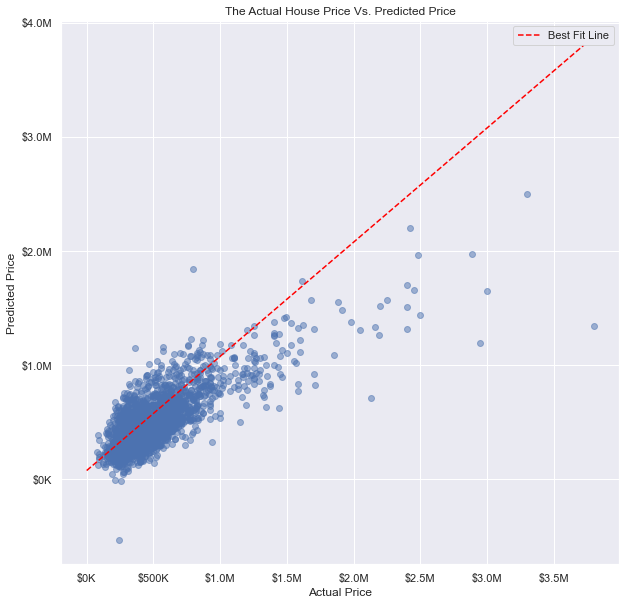

In [64]:
preds = multi_sqft.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="red", label="predicted price and actual price 1:1 line")
ax.scatter(y_test, preds, alpha=0.5)
ax.ticklabel_format(style='plain')
ax.xaxis.set_major_formatter(currency)
ax.yaxis.set_major_formatter(currency)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.set_title("The Actual House Price Vs. Predicted Price")
ax.legend();
plt.savefig('The Actual House Price Vs. Predicted Price.png', dpi=400)

From the visualization, we do see some linear relation between the predicted price and actual price, especially below 1M. Our model still has very large error when predicting the price, and it does not perform well on predicting the house price above 1M dollars.

# Look into how quality of home affects price

We wanted to check if the quality of the houses themselves had any affect on the prices of the house so we ran a multiregression formula to show us how they correspond.

In [65]:
# created a seperate variables just looking at categories that deal with quality of housing
df_quality = seattle_final.drop(columns=['id', 'date', 'waterfront', 'View_EXCELLENT', 'View_FAIR', 'View_GOOD', 'View_NONE', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement','sqft_lot15', 'sqft_above', 'lat', 'long', 'sqft_living15', 'yr_built', 'zipcode'], axis=1)
df_quality2 = pd.concat([df_quality, encoded_X_train_zip], axis=1)
df_quality2

,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good,grade10 Very Good,grade11 Excellent,grade12 Luxury,grade13 Mansion,grade4 Low,grade5 Fair,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
12171,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11338,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13395,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6060,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6753,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
X_test_quality = X_test.drop(columns=['id', 'date', 'waterfront', 'View_EXCELLENT', 'View_FAIR', 'View_GOOD', 'View_NONE', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement','sqft_lot15', 'sqft_above', 'lat', 'long', 'sqft_living15', 'yr_built', 'zipcode'], axis=1)
X_test_quality.head()

,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good,grade10 Very Good,grade11 Excellent,grade12 Luxury,grade13 Mansion,grade4 Low,grade5 Fair,grade6 Low Average,grade8 Good,grade9 Better
4693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7276,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
df_quality.head()

,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good,grade10 Very Good,grade11 Excellent,grade12 Luxury,grade13 Mansion,grade4 Low,grade5 Fair,grade6 Low Average,grade8 Good,grade9 Better,price
12171,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,710500.0
11338,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,651500.0
8169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299000.0
13395,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,696500.0
2209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,276000.0


In [68]:
xquality = df_quality.drop('price', axis = 1)
yquality = df_quality['price']

In [69]:
#created a multiregression to show the relation between all the chosen variables and price.
quality = sm.OLS(yquality, xquality).fit()
quality.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.749
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                              1334.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):                        0.00
Time:                        07:10:07   Log-Likelihood:                         -82081.
No. Observations:                5819   AIC:                                  1.642e+05
Df Residuals:                    5806   BIC:                                  1.643e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Cond_Fair            2.14e+05   4.26e+04      5.022      0.000     1.3e+05    2.98e+05
Cond_Good           3.505e+05   9118.205     38.437      0.000    3.33e+05    3.68e+05
Cond_Poor           1.724e+05    9.1e+04      1.893      0.058   -6123.980    3.51e+05
Cond_Very Good      4.313e+05   1.35e+04     31.857      0.000    4.05e+05    4.58e+05
grade10 Very Good   1.273e+06   2.66e+04     47.887      0.000    1.22e+06    1.33e+06
grade11 Excellent   1.841e+06   5.26e+04     34.986      0.000    1.74e+06    1.94e+06
grade12 Luxury      2.274e+06   1.08e+05     21.059      0.000    2.06e+06    2.49e+06
grade13 Mansion      4.48e+06   1.87e+05     23.960      0.000    4.11e+06    4.85e+06
grade4 Low          8.371e+04   1.45e+05      0.577      0.564   -2.01e+05    3.68e+05
grade5 Fair         1.345e+05   4.35e+04      3.095      0.002    4.93e+04     2.2e+05
grade6 Low Average  1.659e+05   1.16e+04     14.247      0.000    1.43e+05    1.89e+05
grade8 Good         4.936e+05   8640.771     57.129      0.000    4.77e+05    5.11e+05
grade9 Better       8.283e+05   1.56e+04     53.257      0.000    7.98e+05    8.59e+05
==============================================================================
Omnibus:                      586.856   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2754.976
Skew:                           0.387   Prob(JB):                         0.00
Kurtosis:                       6.281   Cond. No.                         24.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We found that you can see a really good trend with higher grade is higher price of housing, and the better the condition the higher the price as well.

In [70]:
#checked for correlation between the x variables and price
df_quality.corr()

,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good,grade10 Very Good,grade11 Excellent,grade12 Luxury,grade13 Mansion,grade4 Low,grade5 Fair,grade6 Low Average,grade8 Good,grade9 Better,price
Cond_Fair,1.000000,-0.057911,-0.004830,-0.034769,-0.005868,-0.008275,-0.004017,-0.002318,0.055067,0.126760,0.083291,-0.056180,-0.029300,-0.059890
Cond_Good,-0.057911,1.000000,-0.026847,-0.193264,-0.031651,-0.001260,0.008237,0.004753,-0.002973,-0.016621,0.049666,-0.082015,-0.046615,0.034619
Cond_Poor,-0.004830,-0.026847,1.000000,-0.016119,-0.007697,-0.003836,-0.001862,-0.001075,-0.001388,0.141819,0.052718,-0.027848,-0.013583,-0.032006
Cond_Very Good,-0.034769,-0.193264,-0.016119,1.000000,0.033414,0.007334,0.000921,-0.007736,-0.009989,-0.011507,-0.022451,-0.025301,0.008368,0.156849
grade10 Very Good,-0.005868,-0.031651,-0.007697,0.033414,1.000000,-0.013188,-0.006402,-0.003694,-0.004770,-0.016321,-0.067138,-0.095733,-0.046694,0.397773
grade11 Excellent,-0.008275,-0.001260,-0.003836,0.007334,-0.013188,1.000000,-0.003191,-0.001841,-0.002378,-0.008135,-0.033463,-0.047715,-0.023274,0.331271
grade12 Luxury,-0.004017,0.008237,-0.001862,0.000921,-0.006402,-0.003191,1.000000,-0.000894,-0.001154,-0.003949,-0.016245,-0.023163,-0.011298,0.212071
grade13 Mansion,-0.002318,0.004753,-0.001075,-0.007736,-0.003694,-0.001841,-0.000894,1.000000,-0.000666,-0.002279,-0.009374,-0.013366,-0.006520,0.261533
grade4 Low,0.055067,-0.002973,-0.001388,-0.009989,-0.004770,-0.002378,-0.001154,-0.000666,1.000000,-0.002942,-0.012104,-0.017259,-0.008418,-0.028704
grade5 Fair,0.126760,-0.016621,0.141819,-0.011507,-0.016321,-0.008135,-0.003949,-0.002279,-0.002942,1.000000,-0.041413,-0.059052,-0.028803,-0.078416


With this correlation matrix we can see that good grades and conditions lead to higher correlation with price and vice versa for poor conditions and grades. the highest correlated value is when a grade is excellent.

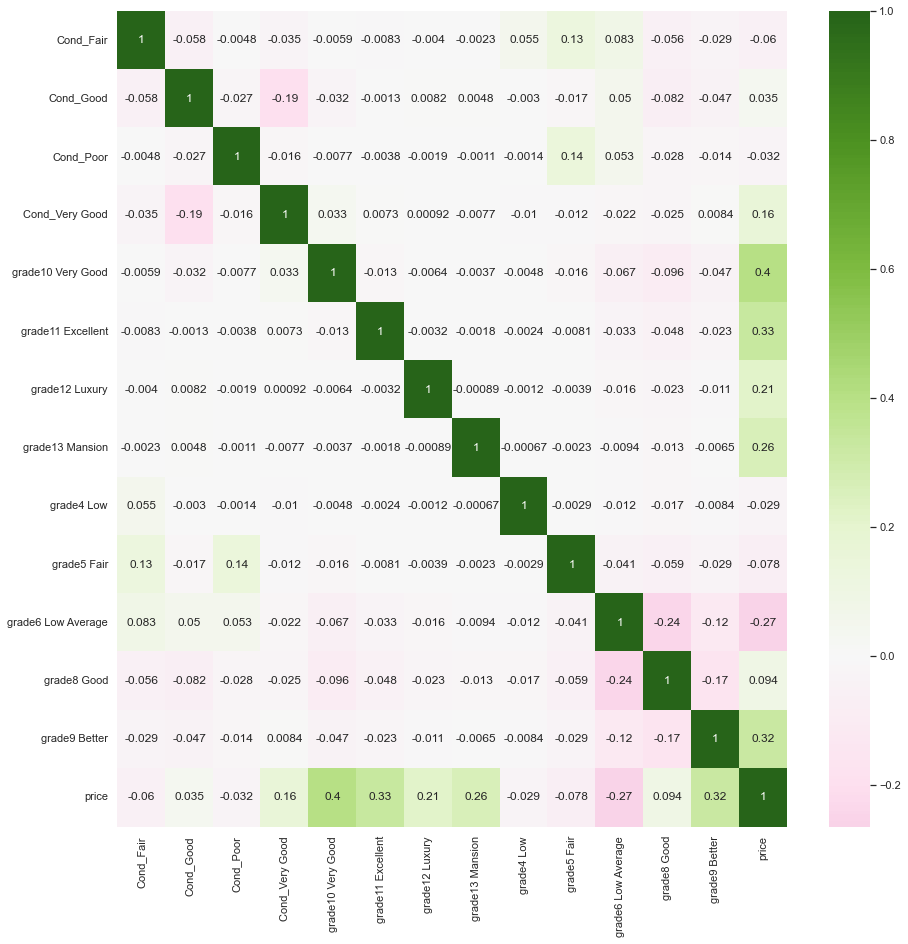

In [71]:
#heat map of the correlations
sns.set(rc={'figure.figsize':(15, 15)})
sns.heatmap(df_quality.corr(), annot = True, cmap="PiYG", center=0);

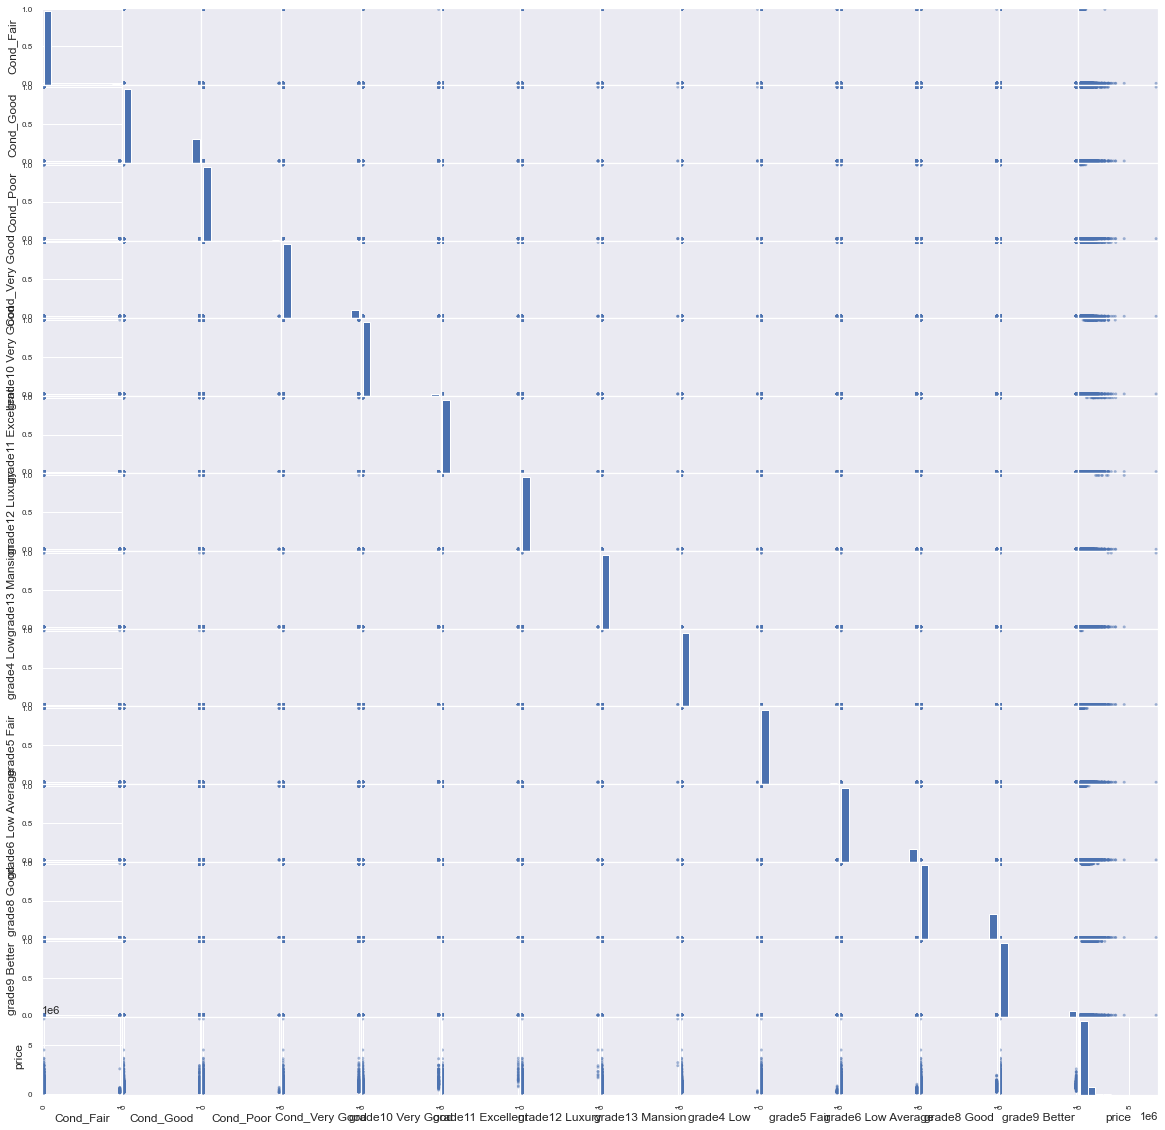

In [72]:
#full scatter plots of the variables, not much can be determined here.
pd.plotting.scatter_matrix(df_quality,figsize  = [20, 20]);
plt.show()

In [73]:
x_train_quality = df_quality.drop('price', axis = 1)
y_train_quality = df_quality['price']

# Look into how location affects price


In [74]:
# Inspect our X_test dataframe to understand what we are working with
X_test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,...,View_NONE,grade10 Very Good,grade11 Excellent,grade12 Luxury,grade13 Mansion,grade4 Low,grade5 Fair,grade6 Low Average,grade8 Good,grade9 Better
4693,9126101645,6/10/2014,4,2.00,2180,3870,1.0,0.0,1020,1160.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12863,3782100035,8/13/2014,3,1.00,960,8100,1.0,0.0,960,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7276,5605000430,9/17/2014,4,2.50,2790,5450,2.0,0.0,1930,860.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21360,1282300995,2/22/2015,3,2.25,1310,915,2.0,0.0,1060,250.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1687,2767604247,7/11/2014,2,2.50,1140,1181,3.0,0.0,1140,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [75]:
# Create a dataframe from our training X set that only includes location information
df_loc = seattle_final[['zipcode', 'lat', 'long']]
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819 entries, 12171 to 12721
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zipcode  5819 non-null   int64  
 1   lat      5819 non-null   float64
 2   long     5819 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 181.8 KB


In [76]:
# Combine our location training X set with the y training set in order to create a pairplot
df_loc_price = pd.concat([df_loc, y_train], axis=1)

In [77]:
df_loc_price.head()

,zipcode,lat,long,price
12171,98107,47.6608,-122.359,710500.0
11338,98103,47.6893,-122.350,651500.0
8169,98118,47.5413,-122.281,299000.0
13395,98103,47.6832,-122.343,696500.0
2209,98106,47.5535,-122.362,276000.0


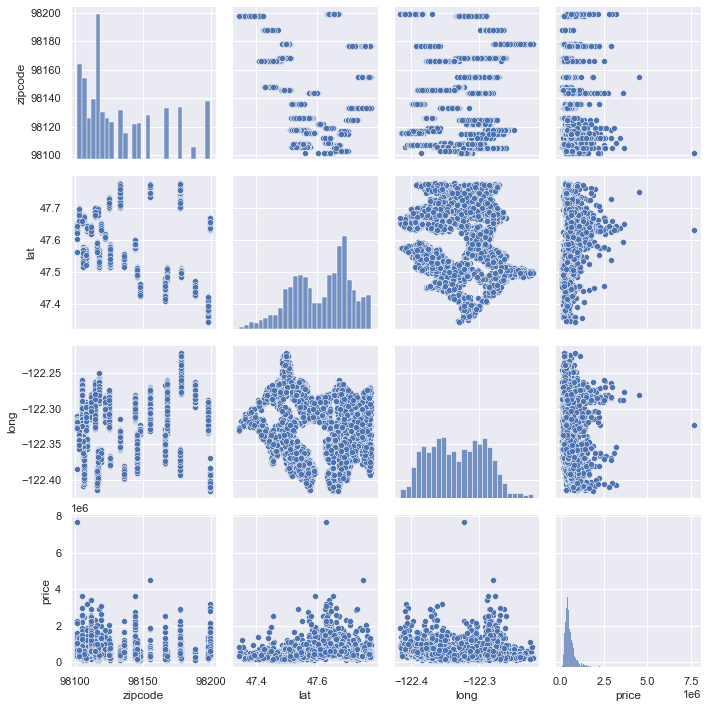

In [78]:
sns.pairplot(df_loc_price)

Based on the pairplots for price compared to latitude and longitude, there are distinct peaks that have more higher priced houses based on location. At the moment, our model is treating zip codes in Seattle, WA as numerical data when it should be categorical. We will use OHE encoded data from the feature engineering section when creating our models.

In [79]:
df_loc_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819 entries, 12171 to 12721
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zipcode  5819 non-null   int64  
 1   lat      5819 non-null   float64
 2   long     5819 non-null   float64
 3   price    5819 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 387.3 KB


In [80]:
# Remove price from our training X set
X_train_loc = df_loc_price.drop(columns='price', axis=1)

In [81]:
X_train_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819 entries, 12171 to 12721
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zipcode  5819 non-null   int64  
 1   lat      5819 non-null   float64
 2   long     5819 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 341.8 KB


In [82]:
X_test_loc = X_test[['zipcode', 'lat', 'long']]

In [83]:
# Remove the zipcode column and add columns for each individual zipcode in the dataset
X_train_zip = pd.concat([X_train_loc, encoded_X_train_zip], axis=1).drop(columns='zipcode', axis=1)
X_test_zip = pd.concat([X_test_loc, encoded_X_test_zip], axis=1).drop(columns='zipcode', axis=1)
X_test_zip.head()

,lat,long,zip_98102,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
4693,47.6089,-122.303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12863,47.7763,-122.305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7276,47.6453,-122.303,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21360,47.5738,-122.293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1687,47.6713,-122.383,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, we'll perform a multiple linear regression using our 3 location factors before transforming any columns.

In [84]:
# Instantiate our linear regression object
mlr = LinearRegression()

In [85]:
# Create fitted model based on our training data
mlr_fit = mlr.fit(np.array(X_train_zip).reshape(-1,30), np.array(y_train).reshape(-1,1))

In [86]:
# Calculate our r^2 value for the training set of data
train_score_loc = mlr_fit.score(np.array(X_train_zip).reshape(-1,30), np.array(y_train).reshape(-1,1))
print(train_score_loc)

0.310192020456283


In [87]:
# Calculate our r^2 value for the testing set of data
test_score_loc = mlr_fit.score(np.array(X_test_zip).reshape(-1,30), np.array(y_test).reshape(-1,1))
print(test_score_loc)

0.31180360905761784


In [88]:
# Calculate the root mean squared error for our predicted home prices 
RMSE_loc = mean_squared_error(y_test, mlr_fit.predict(X_test_zip))
print(RMSE_loc)

76496211267.46463


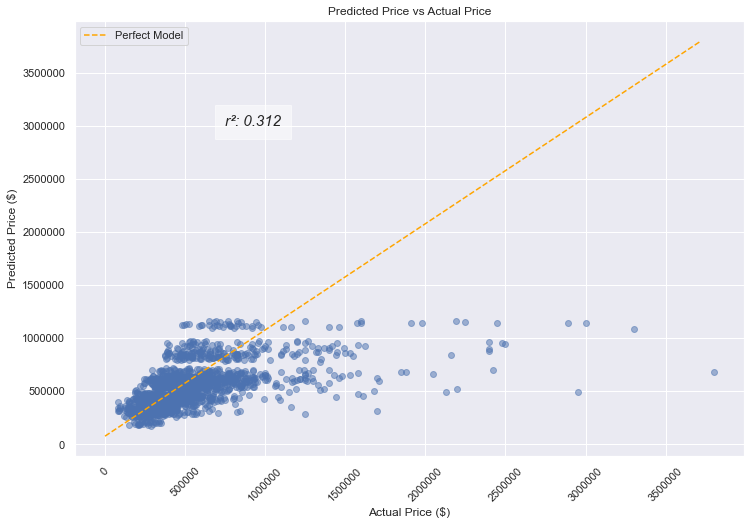

In [89]:
# Plot our predicted home prices vs the actual home prices
fig, ax = plt.subplots(figsize=(12,8))

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Model")
ax.scatter(y_test, mlr_fit.predict(X_test_zip), alpha=0.5)
ax.set_xlabel("Actual Price ($)")
ax.set_ylabel("Predicted Price ($)")
ax.set_title('Predicted Price vs Actual Price')
ax.text(750000, 3000000, 'r\u00b2: ' + str(round(test_score_loc, 3)), style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, fontsize=15)
ax.ticklabel_format(style='plain')
ax.tick_params(axis='x', labelrotation = 45)
ax.legend();

plt.savefig('./images/location_linear_regr.png', dpi=400)

Based on our score above, our model does very poorly at modeling the data based on the raw location columns. I will now perform feature engineering to modify our inputs to better model the price of homes in King County.

In [90]:
# Instantiate a polynomial features object of degree 2 to include more input variables based on the base location variables
pf2 = PolynomialFeatures(2)

In [91]:
# Create a fitted object for our training data
X_train_pf2 = pf2.fit(X_train_zip)

In [92]:
# Transform our X training set using our polynomial features object
X_train_pf2_trans = pf2.transform(X_train_zip)

In [93]:
# Fit the model to our transformed data
mlr_fit2 = mlr.fit(np.array(X_train_pf2_trans).reshape(-1,496), np.array(y_train).reshape(-1,1))

In [94]:
# Transform our X testing set using our polynomial features object
X_test_pf2_trans = pf2.transform(X_test_zip)

In [95]:
# Calculate the r^2 value for our training set that has been transformed with a second degree polynomial
mlr_fit2.score(np.array(X_train_pf2_trans).reshape(-1,496), np.array(y_train).reshape(-1,1))

0.44152430361353323

In [96]:
# Calculate the r^2 value for our testing set that has been transformed with a second degree polynomial
mlr_fit2.score(np.array(X_test_pf2_trans).reshape(-1,496), np.array(y_test).reshape(-1,1))

0.3984127748003434

In [97]:
# Calculate the root mean squared error for our predicted home prices 
RMSE_loc2 = mean_squared_error(y_test, mlr_fit2.predict(X_test_pf2_trans))
print(RMSE_loc2)

66869201989.95


By applying a polynomial transform to our location data, the variance in our home prices appears to be better represented by our inputs. The root mean squared error also decreased by approximately 10B dollars. We will iterate through this process to determine if increasing the polynomial degree improves our $r^2$ coefficient.

In [98]:
# Instantiate polynomial features object of degree 3, fit and transform the X training set, and fit the model
pf3 = PolynomialFeatures(3)
X_train_pf3 = pf3.fit(X_train_zip)
X_train_pf3_trans = pf3.transform(X_train_zip)
mlr_fit3 = mlr.fit(np.array(X_train_pf3_trans).reshape(-1,5456), np.array(y_train).reshape(-1,1))

In [99]:
# Transform X testing set and calculate r^2 value for our training data
X_test_pf3_trans = pf3.transform(X_test_zip)
mlr_fit3.score(np.array(X_train_pf3_trans).reshape(-1,5456), np.array(y_train).reshape(-1,1))

0.5041540767749711

In [100]:
# calculate the r^2 value for our test data
mlr_fit3.score(np.array(X_test_pf3_trans).reshape(-1,5456), np.array(y_test).reshape(-1,1))

0.45478558401291713

In [101]:
# Calculate the root mean squared error for our predicted home prices 
RMSE_loc3 = mean_squared_error(y_test, mlr_fit3.predict(X_test_pf3_trans))
print(RMSE_loc3)

60603103562.202576


Given that for our previous model the r2 score is significantly higher for our training data, we may have slightly overfit our model to the data. 

This correlation score is improving, but we would like to create a model with more correlation between our inputs and home price. Next, I will try to create simple features based on latitude, longitude, and zip code to improve the model.

In [102]:
# Create new training and testing dataframes that include the product of latitude and longitude rather than each individually
X_train_latlong = X_train_zip.copy()
X_train_latlong['lat * long'] = X_train_latlong['lat'] * X_train_latlong['long']
X_train_latlong.drop(columns=['lat', 'long'], axis=1, inplace=True)

X_test_latlong = X_test_zip.copy()
X_test_latlong['lat * long'] = X_test_latlong['lat'] * X_test_latlong['long']
X_test_latlong.drop(columns=['lat', 'long'], axis=1, inplace=True)


In [103]:
# Fit and transform the new training and testing datasets
X_train_latlong_pf3 = pf3.fit(X_train_latlong)
X_train_latlong_pf3_trans = pf3.transform(X_train_latlong)

X_test_latlong_pf3_trans = pf3.transform(X_test_latlong)

In [104]:
# Fit the model
latlong_pf3_train = mlr.fit(np.array(X_train_latlong_pf3_trans).reshape(-1,4960), np.array(y_train).reshape(-1,1))

In [105]:
# Calculate the r^2 value for our training set
latlong_pf3_train.score(np.array(X_train_latlong_pf3_trans).reshape(-1,4960), np.array(y_train).reshape(-1,1))

0.3553573720850046

In [106]:
# Calculate the r^2 value for our testing set
latlong_pf3_train.score(np.array(X_test_latlong_pf3_trans).reshape(-1,4960), np.array(y_test).reshape(-1,1))

0.33965319927014603

In [107]:
# Calculate the root mean squared error for our predicted home prices 
RMSE_latlong = mean_squared_error(y_test, mlr.predict(X_test_latlong_pf3_trans))
print(RMSE_latlong)

73400600530.98195


I will now try to add in more inputs to boost our pf3 model (sqft_living and sqft_living15).

In [108]:
# include sqft living data in our testing and training sets
X_train_loc_sqft = pd.concat([X_train_zip, df_seattle2[['sqft_living', 'sqft_living15']]], axis=1)
X_test_loc_sqft = pd.concat([X_test_zip, X_test[['sqft_living', 'sqft_living15']]], axis=1)
X_train_loc_sqft.head()

,lat,long,zip_98102,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,...,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,sqft_living,sqft_living15
12171,47.6608,-122.359,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2040,1620
11338,47.6893,-122.350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500,1480
8169,47.5413,-122.281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1550,2120
13395,47.6832,-122.343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2540,1560
2209,47.5535,-122.362,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1140,1140


In [109]:
# Fit and transform the training data, then fit the model
X_train_full_pf3 = pf3.fit(X_train_loc_sqft)
X_train_full_pf3_trans = pf3.transform(X_train_loc_sqft)
mlr_pf3_full = mlr.fit(np.array(X_train_full_pf3_trans).reshape(-1,6545), np.array(y_train).reshape(-1,1))

In [110]:
# Transform the testing data, then calculate the r^2 value for our training set
X_test_full_pf3_trans = pf3.transform(X_test_loc_sqft)
mlr_pf3_full.score(np.array(X_train_full_pf3_trans).reshape(-1,6545), np.array(y_train).reshape(-1,1))

0.8688776614218159

In [111]:
# Calculate the r^2 value for our testing set
mlr_pf3_full.score(np.array(X_test_full_pf3_trans).reshape(-1,6545), np.array(y_test).reshape(-1,1))

0.7746586399423763

In [112]:
# Calculate the root mean squared error for our predicted home prices 
RMSE_loc_size = mean_squared_error(y_test, mlr_pf3_full.predict(X_test_full_pf3_trans))
print(RMSE_loc_size)

25047734212.411755


It appears that this model still slightly overfits our data, but the correlation values are much higher than without the inclusion of sqft data. 

In [113]:
# Add house quality data to our training and testing sets
X_train_fin = pd.concat([X_train_loc_sqft, xquality], axis=1)
X_test_fin = pd.concat([X_test_loc_sqft, X_test_quality], axis=1)
X_train_fin.head()

,lat,long,zip_98102,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,...,Cond_Very Good,grade10 Very Good,grade11 Excellent,grade12 Luxury,grade13 Mansion,grade4 Low,grade5 Fair,grade6 Low Average,grade8 Good,grade9 Better
12171,47.6608,-122.359,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11338,47.6893,-122.350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8169,47.5413,-122.281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13395,47.6832,-122.343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2209,47.5535,-122.362,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
# Fit and transform the training and testing sets
X_train_fin_pf3 = pf3.fit(X_train_fin)
X_train_fin_pf3_trans = pf3.transform(X_train_fin)
X_test_fin_pf3_trans = pf3.transform(X_test_fin)

In [115]:
# Fit the model
mlr_pf3_fin = mlr.fit(np.array(X_train_fin_pf3_trans).reshape(-1,17296), np.array(y_train).reshape(-1,1))

In [116]:
# Calculate the r^2 value for our training set
mlr_pf3_fin.score(np.array(X_train_fin_pf3_trans).reshape(-1,17296), np.array(y_train).reshape(-1,1))

0.9346709059406804

In [117]:
# Calculate the r^2 value for our testing set
mlr_pf3_fin.score(np.array(X_test_fin_pf3_trans).reshape(-1,17296), np.array(y_test).reshape(-1,1))

-4784.503187604195

This model appears to be extremely overfit to our training data. We will use a lower order polynomial feature. 

In [118]:
# Fit and transform the training and testing sets
X_train_fin_pf2 = pf2.fit(X_train_fin)
X_train_fin_pf2_trans = pf2.transform(X_train_fin)
X_test_fin_pf2_trans = pf2.transform(X_test_fin)

In [119]:
# Fit the model
mlr_pf2_fin = mlr.fit(np.array(X_train_fin_pf2_trans).reshape(-1,1081), np.array(y_train).reshape(-1,1))

In [120]:
# Calculate the r^2 value for our training set
mlr_pf2_fin.score(np.array(X_train_fin_pf2_trans).reshape(-1,1081), np.array(y_train).reshape(-1,1))

0.8977564206718779

In [121]:
# Calculate the r^2 value for our testing set
mlr_pf2_fin.score(np.array(X_test_fin_pf2_trans).reshape(-1,1081), np.array(y_test).reshape(-1,1))

-135.14405270032987

A model with a second degree polynomial feature transformation is still overfitting our data with the number of inputs we have. We will go back to our basic linear regression model with our 45 input columns.

In [122]:
# Fit the model
mlr_fin = mlr.fit(np.array(X_train_fin).reshape(-1,45), np.array(y_train).reshape(-1,1))

In [123]:
# Calculate the r^2 value for our training set
mlr_fin.score(np.array(X_train_fin).reshape(-1,45), np.array(y_train).reshape(-1,1))

0.8074951498135287

In [124]:
# Calculate the r^2 value for our training set
mlr_fin.score(np.array(X_test_fin).reshape(-1,45), np.array(y_test).reshape(-1,1))

0.7872352340295985

Based on our findings from home price varying with sqft data, we will also add in a column for the sqft_lot15 data as this result was statistically significant in the preliminary sqft linear regression (immediately following feature engineering).

In [125]:
# Add the home lot data to our training and testing sets
final_X_train = pd.concat([X_train_fin, pd.DataFrame(sqft_15_lot)], axis=1)
final_X_test = pd.concat([X_test_fin, pd.DataFrame(X_test[['sqft_lot15']])], axis=1)
final_X_test.head()

,lat,long,zip_98102,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,...,grade10 Very Good,grade11 Excellent,grade12 Luxury,grade13 Mansion,grade4 Low,grade5 Fair,grade6 Low Average,grade8 Good,grade9 Better,sqft_lot15
4693,47.6089,-122.303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2580
12863,47.7763,-122.305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8100
7276,47.6453,-122.303,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5450
21360,47.5738,-122.293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1215
1687,47.6713,-122.383,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1189


In [126]:
# Fit the model
final_mlr = mlr.fit(np.array(final_X_train).reshape(-1,46), np.array(y_train).reshape(-1,1))

In [127]:
# Calculate the r^2 value for our training set
final_train_score = final_mlr.score(np.array(final_X_train).reshape(-1,46), np.array(y_train).reshape(-1,1))
print(final_train_score)

0.8077554167797356


In [128]:
# Calculate the r^2 value for our testing set
final_test_score = final_mlr.score(np.array(final_X_test).reshape(-1,46), np.array(y_test).reshape(-1,1))
print(final_test_score)

0.7875284211692687


In [129]:
# Calculate the root mean squared error for our final model
RMSE_final = mean_squared_error(y_test, final_mlr.predict(final_X_test))
print(RMSE_final)

23617198515.544323


This looks great! Our train and test scores are close to one another and both are > 0.7, which signifies that the variation in home price is explained relatively well by our input data. 

In [130]:
# Create a dataframe of coefficients for each input variable
coefficients = pd.concat([pd.DataFrame(final_X_train.columns),pd.DataFrame(np.transpose(final_mlr.coef_))], axis = 1)
# Select only coefficients that are positive to determine which zip codes lead to an increase in home price based on the model
coefficients[coefficients.iloc[:,1] > 0]

,0,0
1,long,4.677459e+05
2,zip_98102,4.048787e+04
3,zip_98105,4.584759e+04
5,zip_98107,5.576402e+03
7,zip_98109,6.822962e+04
8,zip_98112,1.074073e+05
13,zip_98119,1.091184e+05
30,sqft_living,1.492623e+02
31,sqft_living15,1.140402e+02
32,Cond_Fair,1.285225e+04


We can check our conditions required to run linear regression models below.

In [131]:
# Create our predicted home prices
y_hat = final_mlr.predict(np.array(final_X_test).reshape(-1,46))

In [132]:
y_hat = pd.DataFrame(y_hat, columns=['Predicted Price'], index=final_X_test.index)

In [133]:
y_test_df = pd.DataFrame(y_test, index=final_X_test.index)

In [134]:
# Create one dataframe that has both the acutal and predicted price
y_hat_df = y_hat.join(y_test, on=y_hat.index)

In [135]:
# Create a column for the residuals
y_hat_df['Residual'] = y_hat_df['price'] - y_hat_df['Predicted Price']

In [136]:
y_hat_df.head()

,Predicted Price,price,Residual
4693,5.980075e+05,558000.0,-40007.547202
12863,1.652769e+05,299000.0,133723.069276
7276,1.407429e+06,1160000.0,-247429.396567
21360,4.086469e+05,365000.0,-43646.929063
1687,4.471820e+05,467000.0,19817.970752


### Check Linearity

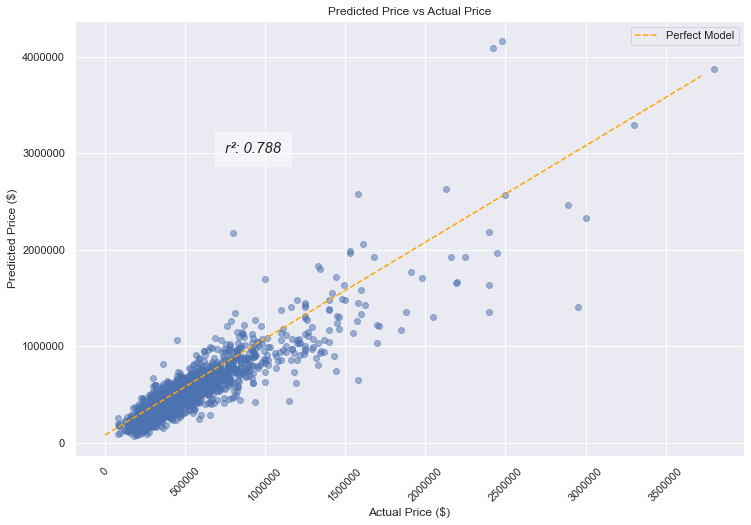

In [137]:
# Plot the predicted price based on our final model vs the actual home prices
fig, ax = plt.subplots(figsize=(12,8))

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Model")
ax.scatter(y_hat_df['price'], y_hat_df['Predicted Price'], alpha=0.5)
ax.set_xlabel("Actual Price ($)")
ax.set_ylabel("Predicted Price ($)")
ax.set_title('Predicted Price vs Actual Price')
ax.text(750000, 3000000, 'r\u00b2: ' + str(round(final_test_score, 3)), style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, fontsize=15)
ax.ticklabel_format(style='plain')
ax.tick_params(axis='x', labelrotation = 45)
ax.legend();

plt.savefig('final_linear_regr.png', dpi=400)

Our data appears to be relatively linear outside of larger outliers. Our model appears to underpredict the price of home's with high list prices. Next, we will check for normality in our residuals.

We wanted to further look at what zipcodes had the best metrics that we are looking at with our previous findings to figure out which specific zipcodes have the most money based off the 3 categories we determined gave us high end housing.

In [138]:
zipcode_quality = df_seattle[['condition','grade','zipcode']]
zipcode_quality

,condition,grade,zipcode
1,Average,7 Average,98125
3,Very Good,7 Average,98136
8,Average,7 Average,98146
11,Good,7 Average,98115
14,Average,7 Average,98107
...,...,...,...
21591,Average,8 Good,98116
21592,Average,8 Good,98103
21593,Average,8 Good,98146
21594,Average,7 Average,98144


In [139]:
# Calculate VIF scores for each input variable
vif = [variance_inflation_factor(final_X_train.values, i) for i in range(final_X_train.shape[1])]
vif_scores = pd.Series(vif, index=final_X_train.columns, name="Variance Inflation Factor")

In [140]:
vif_scores[vif_scores > 5]

lat              1.235633e+07
long             1.238394e+07
zip_98106        6.097879e+00
zip_98118        5.323804e+00
zip_98126        6.180905e+00
zip_98136        5.261340e+00
zip_98146        7.467613e+00
zip_98166        8.815625e+00
zip_98168        6.515064e+00
zip_98198        1.348769e+01
sqft_living      1.541210e+01
sqft_living15    2.688582e+01
sqft_lot15       5.903792e+00
Name: Variance Inflation Factor, dtype: float64

Latitude and longitude are clearly the two input variables that have the most collinearity, which makes sense because latitude and longitude barely change within a given city/county. All other variables are just over 5, so we are just barely breaking this assumpution. We can try to modify our model by removing latitude and a few of the sqft columns. 

### Check Homoskedasticity

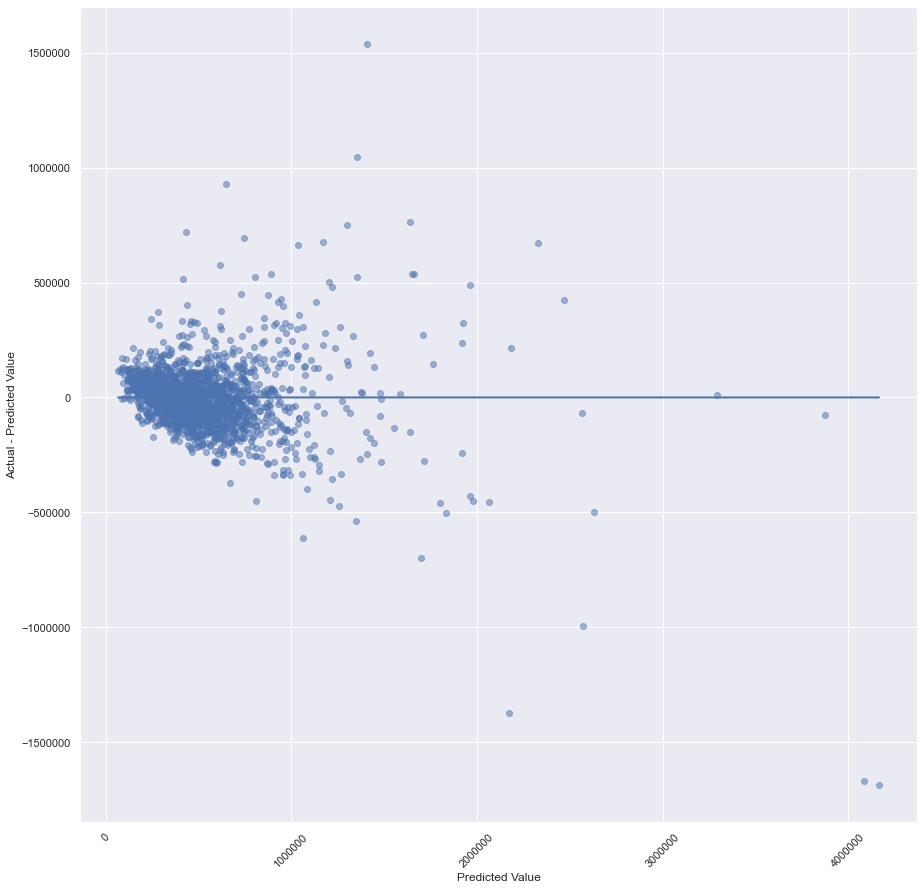

In [141]:
# Check the residual distribution vs predicted value
fig, ax = plt.subplots()

ax.scatter(y_hat_df['Predicted Price'], y_hat_df['Residual'], alpha=0.5)
ax.plot(y_hat_df['Predicted Price'], [0 for i in range(len(final_X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', labelrotation = 45);

While the shape of our residuals is not the worst for predictions less than $1M, it appears that residuals do vary somewhat with the predicted value. Therefore, we are most likely breaking the strict definition of homoscadasticity.

# Conclusion

Based on our analysis, the top 3 Zip codes for the location of the new restaurant are: 

1. 98109 (East Queen Anne, South Lake Union)<br>

2. 98112 (Stevens, Madison Valley)<br>

3. 98119 (West Queen Anne, North Queen Anne)<br>

The average house prices within these three Zip codes are the highest. 98112 (Stevens, Madison Valley) is our top recommendation, because if the Zip Code is 98112 then the model add 17000 dollars to the house price. Besides the prevalent high-value houses in that area, it also has the most number of good quality houses, which we believe 98112 this the best area for the location of the restaurant. We highly recommend Fogo de Chao can open their new restaurant in one of the neighborhoods at 98112. 

##  Next Step

As for the next step, we can make a better predictive model by dropping the irrelevant Zip codes and doing some more feature engineering to get better data that helps us to reduce the error of the model. With the new model, we hope we could provide Fogo de Chao a more specific address for their new restaurant. 